# event - display with hits
from AnalysisTrees file (eventsTree)

In [ ]:
import sys; sys.path.insert(0, '../');
from ccqe_notebook_tools import *
from tracking_tools import *
%matplotlib inline
# %matplotlib notebook
from IPython.core.display import HTML,display
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
# File = ROOT.TFile("/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna/TracksAnaFiles/Events_MCC7_MC_BNB_AnalysisTrees.root")
# File = ROOT.TFile("/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna/TracksAnaFiles/Events_MCC8_MC_BNB_extBNB_AnalysisTrees.root")
File = ROOT.TFile("/Users/erezcohen/Desktop/uBoone/CCQEanalysis/EventsFiles/EventsFile.root")
tree = File.Get("EventsAnalyzer/eventsTree")
events = calcEventTopologies( tree )

In [ ]:
events

In [ ]:
#---------------------------------------------------------------------------------------------
def draw_evd_tracks_3_planes(hits,tracks,
                             do_print=False,fontsize=20,figsize=(16,12),MCmode=True,
                             do_add_PfromRange=False, 
                             xlim=None, ylim=None ):        
    # 3-planes
    fig = plt.figure(figsize=figsize)
    for plane in range(3):
        ax = fig.add_subplot(1,3,plane+1)
        hit_wire , hit_time , hit_charge , hit_number = plot_hits(hits,plane,ax=ax)

        plt.scatter(hit_wire,hit_time,c=hit_charge, vmin=np.min(hit_charge), vmax=np.max(hit_charge),cmap='hot_r')
        # tracks
        t_start_wire_min , t_end_wire_max , t_start_time_min , t_end_time_max= 8256 , 0 , 9500 , 0
        for t in tracks:
            color, label = set_color_label(t , MCmode=MCmode, do_add_PfromRange=do_add_PfromRange)
            
            t_start_wire , t_start_time , t_end_wire , t_end_time = get_t_start_end(t,plane)
            t_start_wire_min = np.min([t_start_wire , t_end_wire , t_start_wire_min])
            t_end_wire_max   = np.max([t_start_wire , t_end_wire , t_end_wire_max])
            t_start_time_min = np.min([t_start_time , t_end_time , t_start_time_min])
            t_end_time_max   = np.max([t_start_time , t_end_time , t_end_time_max])

            ax.plot( [t_start_wire,t_end_wire] , [t_start_time,t_end_time] 
                    ,label='track %d '%t.track_id+label, color=color,alpha=0.4)
            plt.text( t_start_wire+0.6*(t_end_wire-t_start_wire) , t_start_time+0.3*(t_end_time-t_start_time) 
                     ,'t %d ('%t.track_id+label+')', color=color)
        ax.set_title('(%d/%d/%d) %s plane'%(t.run,t.subrun,t.event,('u' if plane==0 else 'v' if plane==1 else 'y')),y=1.02)
        
        if xlim is None:
            ax.set_xlim( t_start_wire_min - 8 , t_end_wire_max + 8 )
        else: 
            ax.set_xlim( xlim[plane] )
        if ylim is None:
            ax.set_ylim( t_start_time_min - 20 , t_end_time_max + 20 )
        else: 
            ax.set_ylim( ylim[plane] )

        ax.xaxis.set_major_locator(LinearLocator(3))
        ax.yaxis.set_major_locator(LinearLocator(4))
        set_axes(ax,x_label='wire',y_label='peak-time' if plane==0 else '',fontsize=fontsize)
        if plane!=0: ax.yaxis.set_major_formatter( NullFormatter() )
    plt.tight_layout()
#---------------------------------------------------------------------------------------------    

In [ ]:
#---------------------------------------------------------------------------------------------
def draw_evd_tracks_xyz(hits,tracks,
                             do_print=False,fontsize=20,figsize=(16,12),MCmode=True,
                             do_add_PfromRange=False, 
                             xlim=None, ylim=None ):        
    
    fig = plt.figure(figsize=figsize)
    # x-y view
    ax = fig.add_subplot(1,3,1)
    for t in tracks:                    
        color, label = set_color_label(t , MCmode=MCmode, do_add_PfromRange=do_add_PfromRange)
        plt.plot([t.startx,t.endx],[t.starty,t.endy], color=color)
        # start/end points as circles
        ax.add_artist(plt.Circle((t.startx,t.starty), 3, color='black',alpha=0.4))
        ax.add_artist(plt.Circle((t.endx,t.endy), 2, color='red',alpha=0.4))
        plt.text( t.startx+0.6*(t.endx-t.startx) , t.starty+0.3*(t.endy-t.starty) 
                     ,'t %d'%t.track_id, color=color)        
    ax.grid(linestyle='--',alpha=0.5)
    set_axes(ax,x_label='x [cm]' , y_label='y [cm]',fontsize=fontsize)
    ax.xaxis.set_major_locator(LinearLocator(5))
    ax.yaxis.set_major_locator(LinearLocator(5))


    # z-y view
    ax = fig.add_subplot(1,3,(2,3))
    counter=0
    for t in tracks:
        counter+=1
        color, label = set_color_label(t , MCmode=MCmode, do_add_PfromRange=do_add_PfromRange)
        if do_print: print [t.track_id,t.starty,t.endy]
        plt.plot([t.startz,t.endz],[t.starty,t.endy],
                 label='track %d '%t.track_id+label,color=color)
        ax.add_artist(plt.Circle((t.startz,t.starty), 3, color='black',alpha=0.4))
        ax.add_artist(plt.Circle((t.endz,t.endy), 2, color='red',alpha=0.4))
        plt.text( t.startz+0.6*(t.endz-t.startz) , t.starty+0.3*(t.endy-t.starty) 
                     ,'t %d ('%t.track_id+label+')', color=color)        
    ax.grid(linestyle='--',alpha=0.5)
    set_axes(ax,x_label='z [cm]',fontsize=fontsize)
    ax.yaxis.set_major_formatter( NullFormatter() )
    ax.xaxis.set_major_locator(LinearLocator(5))
    ax.yaxis.set_major_locator(LinearLocator(5))
#---------------------------------------------------------------------------------------------    

In [9]:
# ------------------------------------------------
# July-14
def get_event_from_entry( events=None , entry=0 ,debug=False ):
    # return hits and tracks in this entry
    events.GetEntry(entry)
    tracks = [t for t in events.tracks]
    if debug: print 'tracks.size():',len(tracks)
    hits = [hit for hit in events.hits]
    if debug: print 'hits.size():',len(hits)
    return hits, tracks
# ------------------------------------------------

In [ ]:
events.GetEntry(0)

In [ ]:
hits, tracks = get_event_from_entry( events=events, entry=0 ) 

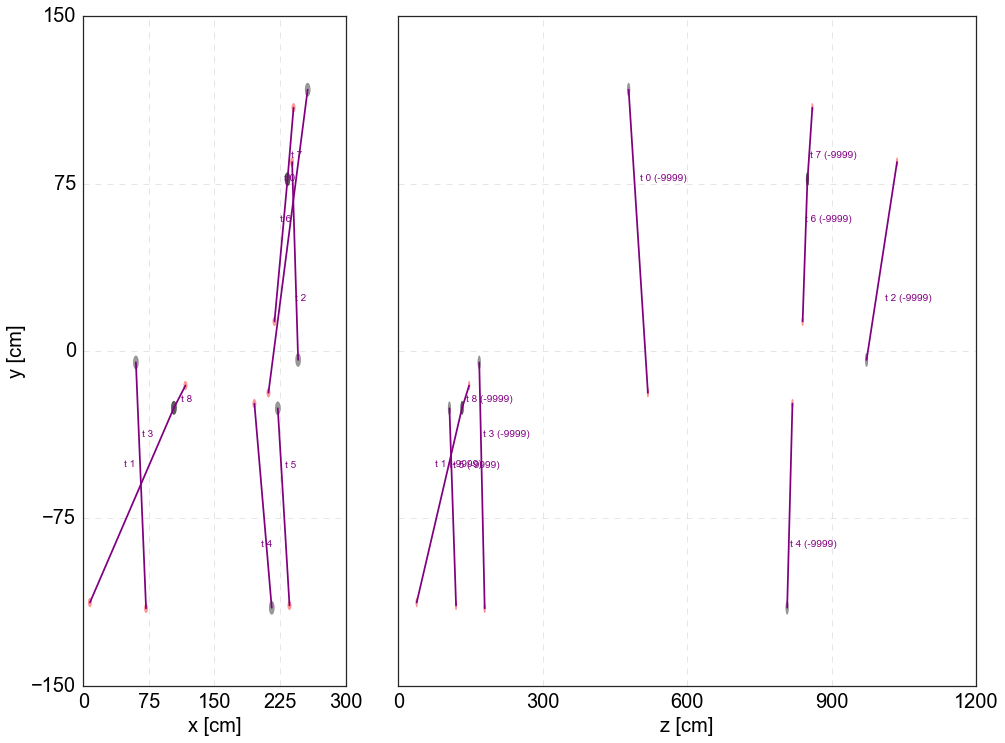

In [7]:
# draw_evd_tracks_3_planes(hits,tracks)
draw_evd_tracks_xyz(hits,tracks)

In [ ]:
hits, tracks = get_event_from_rse( events=events , run=1 , subrun=2756 , event=137753 ,debug=0 ) 